In [29]:
# importing libraries

import spacy
from wordcloud import WordCloud
from collections import Counter
from textblob_de import TextBlobDE as TextBlob
import matplotlib.pyplot as plt
import string
import re
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim import corpora
import pyLDAvis
import seaborn as sns


import numpy as np
import pandas as pd

In [4]:
# load pre-trained spacy model for german language

global nlp
nlp = spacy.load("de_core_news_sm")

In [5]:
# file openener and cleaner

def file_openclean(filename):
    with open(filename) as file:
        fi = file.read().split('.')
        f_clean = [re.sub('\\n', '', f) for f in fi]
        return f_clean
    
test_file = file_openclean('learn_file.txt')

In [6]:
# funtion that performs pos-tagging on a string/sentence and returns a list of pos-tags

def pos_tagger(sent):
    doc = nlp(sent)
    pos_tags = [token.tag_ for token in doc]
    return pos_tags

In [7]:
# function that constructs a dictionary with the count of occurences of elements in inputobject

def count_dict(obj_to_count_from):
    c = Counter(obj_to_count_from)
    sort_c = sorted(c.items(), key=lambda x:x[1], reverse=True)
    sort_dict_c = {obj[0]: obj[1] for obj in sort_c}
    return sort_dict_c

In [8]:
# function that searches string for named entities

def recog_ne(sent):
    doc = nlp(sent)
    named_ents = [ent.label_ for ent in doc.ents]
    return named_ents

In [9]:
# function that performs sentiment analysis on a given string and returns polarity

def sent_analysis(sent):
    blob = TextBlob(sent)
    return blob.sentiment[0]

In [11]:
# prepare some data

pos_tag_count = count_dict(pos_tagger(' '.join(test_file)))


# count the named entities

ne = []

for sen in test_file:
    ne += recog_ne(sen)

counted_na_ent = count_dict(ne)


# sent_analysis for whole article

sent_an = [sent_analysis(sent) for sent in test_file]

In [67]:
def visualize_article_topics(input_string, num_topics):
    # Process the input string using the German language model
    doc = nlp(input_string)

    # Tokenize the input string, removing stop words and punctuation
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]

    # Create a dictionary from the tokenized input
    dictionary = corpora.Dictionary([tokens])
    
    # Create a bag of words representation of the input
    bow = [dictionary.doc2bow(tokens)]

    # Train the LDA model on the input
    lda_model = LdaModel(bow, num_topics=num_topics, id2word=dictionary)
    
    topic_distribution = lda_model[bow]
    # Create a word cloud for each topic
    for topic_id, topic_prob in topic_distribution[0]:
        topic = lda_model.show_topic(topic_id)
        topic_words = " ".join([word for word, prob in topic])
        wordcloud = WordCloud(width=600, height=400).generate(topic_words)
        # Plot the word cloud
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title('WordCloud derived from Topic-Modeling', size=40)
        plt.axis("off")
        plt.show()

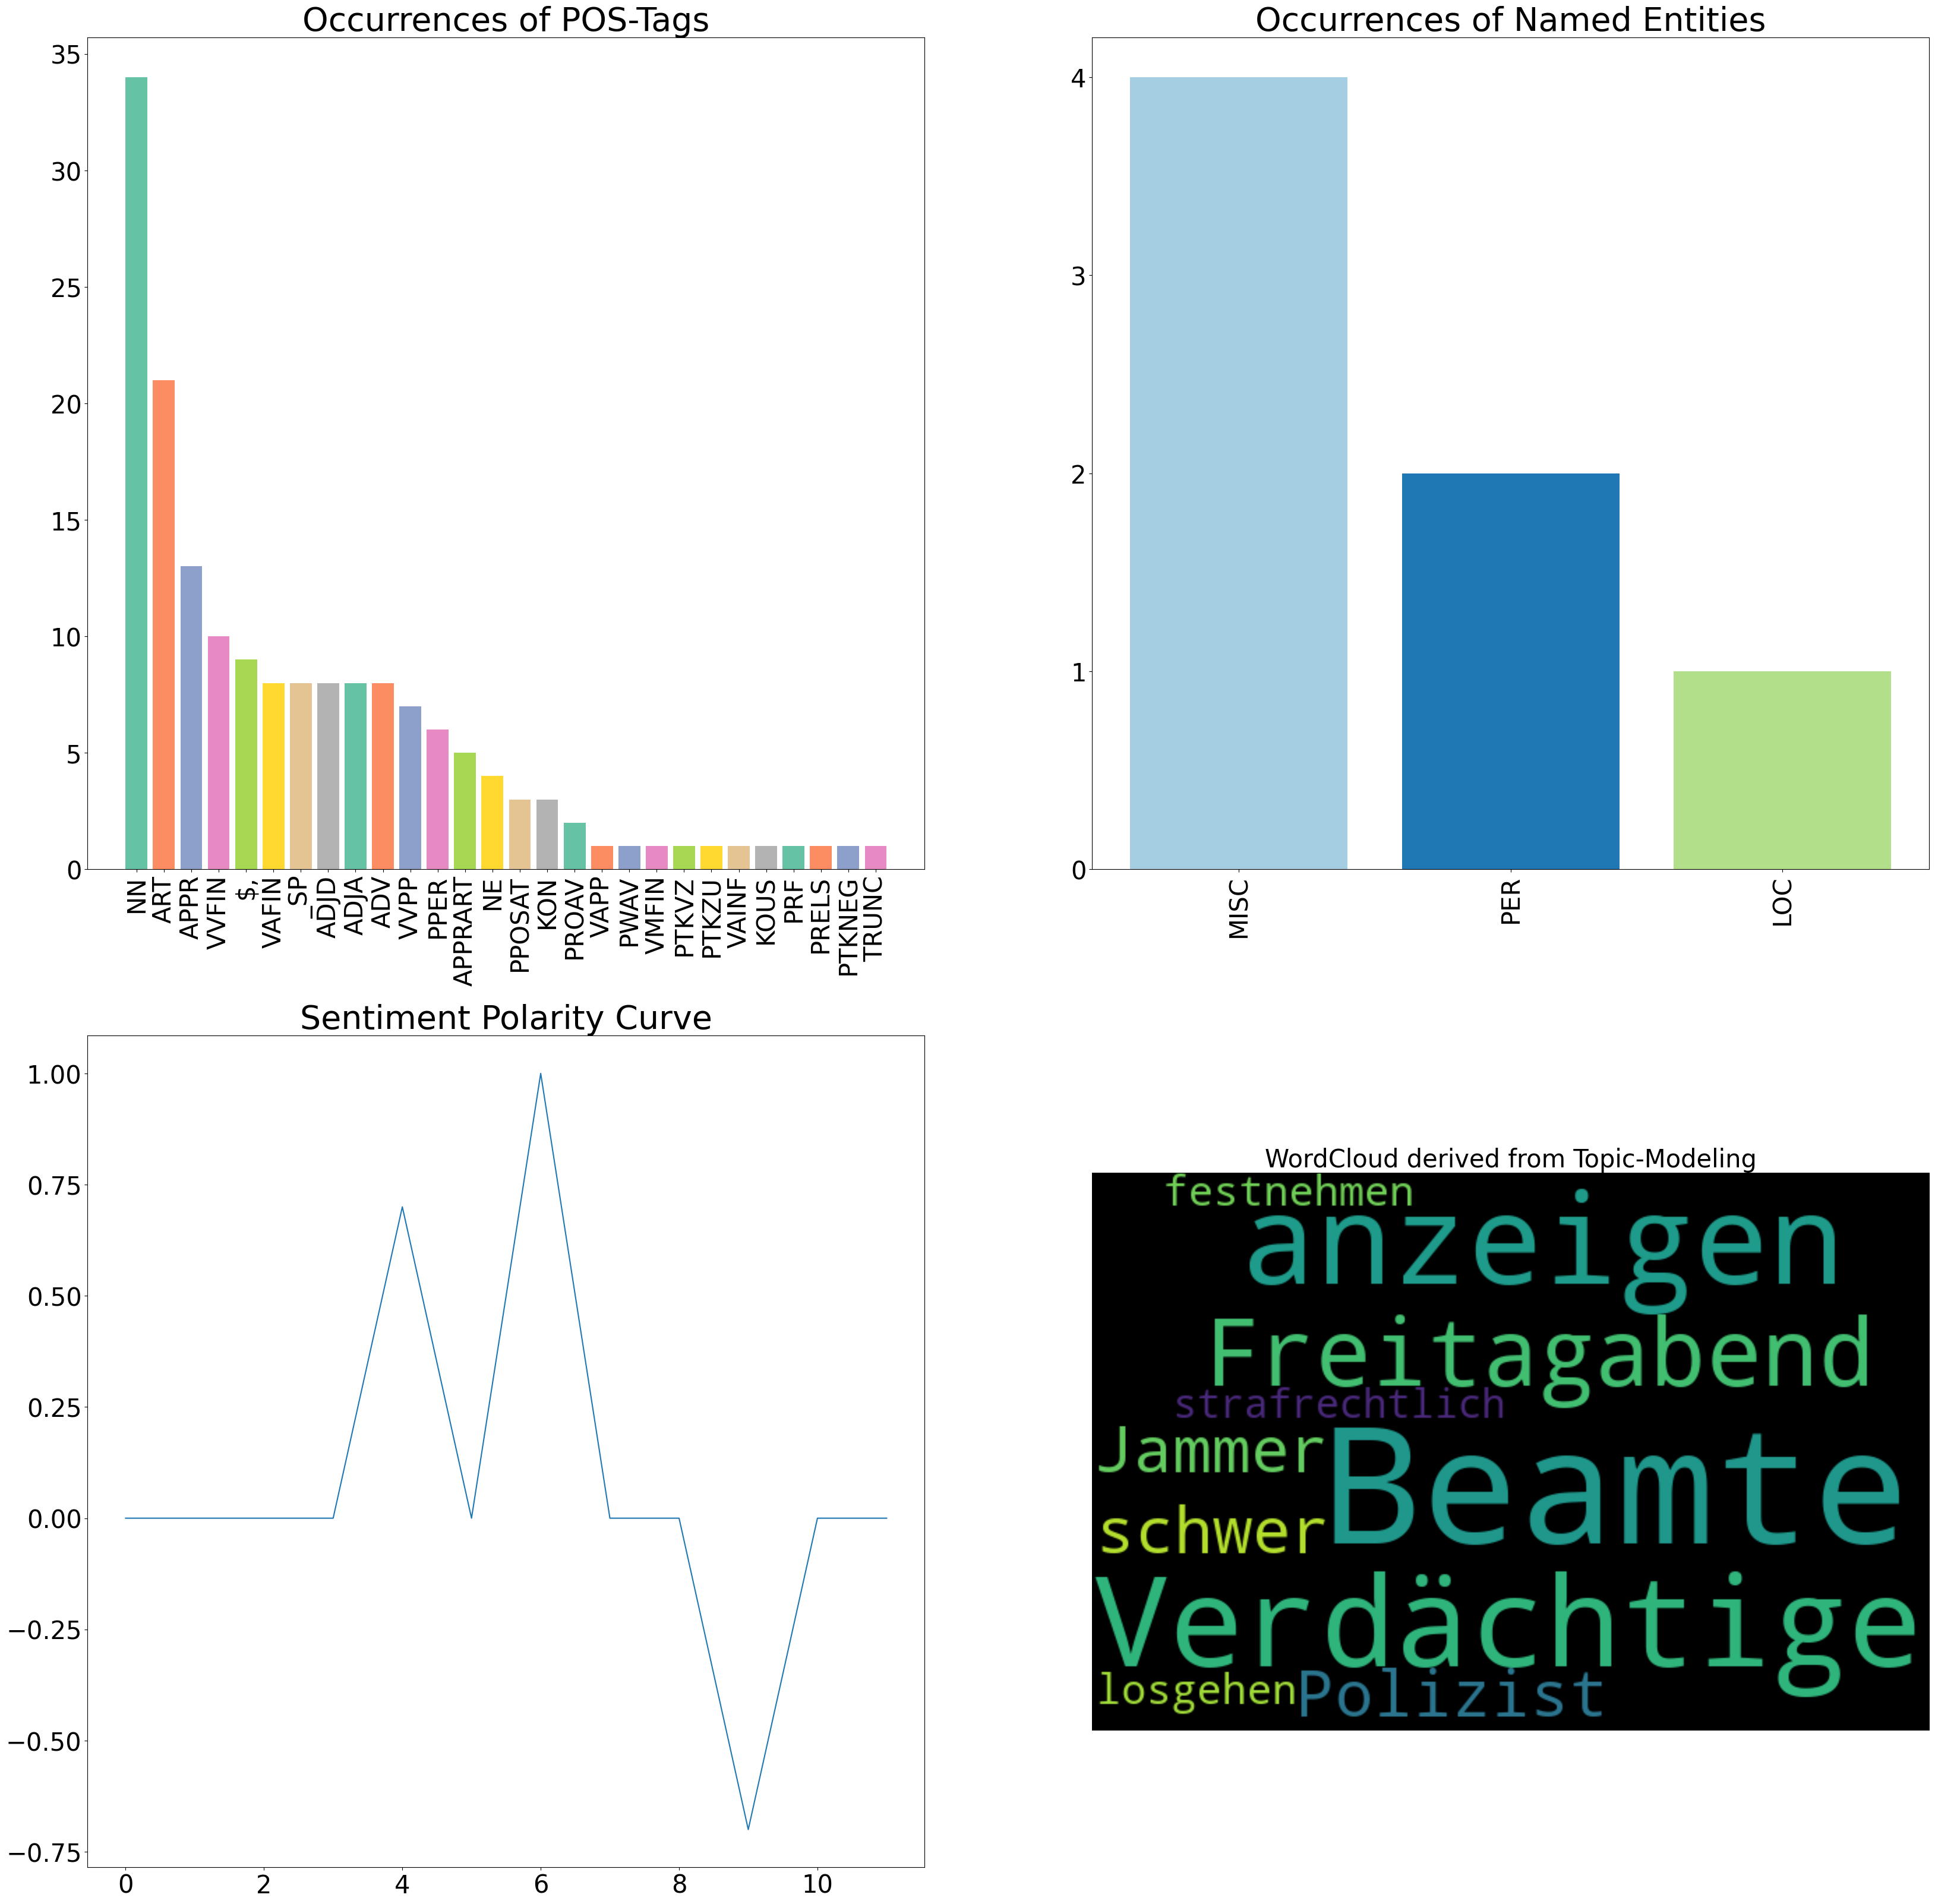

In [93]:
# make a little dashboardlike visualisation 

plt.figure(figsize=(40, 40))


plt.subplot(221)
plt.bar(pos_tag_count.keys(), 
        pos_tag_count.values(),
        color=sns.color_palette('Set2'))
plt.xticks(rotation=90, size=30)
plt.yticks(size=30)
plt.title('Occurrences of POS-Tags', size=40)


plt.subplot(222)
plt.bar(counted_na_ent.keys(), 
        counted_na_ent.values(), 
        color=sns.color_palette('Paired'))
plt.xticks(rotation=90, size=30)
plt.yticks(np.arange(0, max(counted_na_ent.values()) + 1), size=30)
plt.title('Occurrences of Named Entities', size=40)


plt.subplot(223)
plt.plot(list(range(len(sent_an))), sent_an)
plt.yticks(size=30)
plt.xticks(size=30)
plt.title('Sentiment Polarity Curve', size=40)


plt.subplot(224)
visualize_article_topics('.'.join(test_file), 1)


plt.show()